In [430]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Задание 1

Решить линейную регрессию — найти прямую, которая описывает зависимость

N - количество осей (размерность) <br>
M - количество точек <br>
minValue - минимальное значение для иксов <br>
maxValue - максимальное значение для иксов

In [431]:
N = 1
M = 10
minValue = 0
maxValue = 10
STEPS = 1e3
EPS = 1e-6
K = 1e-2


In [432]:
def yRegression(B, X):
    return np.sum(X * B)

B_reg = []
for i in range(N + 1):
    bi = random.randint(minValue, maxValue)
    B_reg.append(bi)
B_reg = np.array(B_reg, dtype='float64')
print(B_reg)
XM = []
YM = []
YR = []
for i in range(M):
    X = [1]
    for j in range(N):
        xj = random.randint(minValue, maxValue)
        X.append(xj)
    X = np.array(X)
    rand_delta = random.randint(-maxValue, maxValue)
    Y_r = yRegression(B_reg, X)
    Y_act = Y_r + random.randint(0, 10) * rand_delta
    YM.append(Y_act)
    XM.append(np.array(X))
    YR.append(Y_r)
XM = np.array(XM)
YM = np.array(YM)
YR = np.array(YR)
print(XM)
print(YM)
print(YR)

[ 5. 10.]
[[1 8]
 [1 1]
 [1 4]
 [1 7]
 [1 9]
 [1 6]
 [1 9]
 [1 8]
 [1 0]
 [1 1]]
[ 64.   6.  10.  65.  87. 113. 101. 112.  41.  15.]
[85. 15. 45. 75. 95. 65. 95. 85.  5. 15.]


11558.003999999997 9524.61301844459


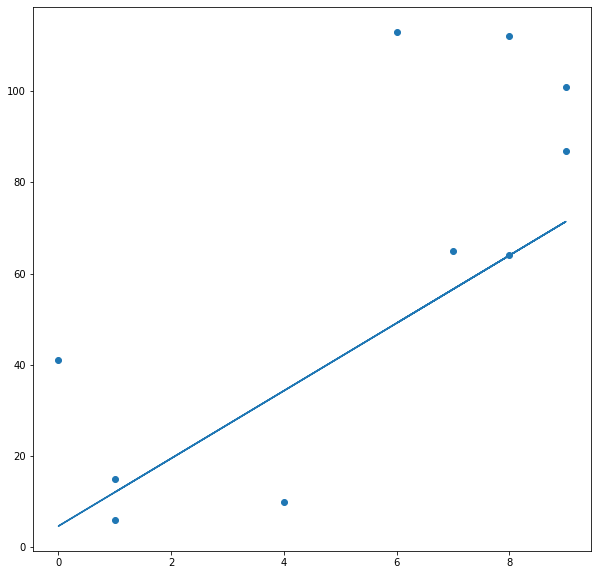

In [433]:
def squaredError(Y_act, Y_reg):
    error = 0
    for i in range(M):
        error += (Y_act[i] - Y_reg[i]) ** 2
    return error

def stoppingCriteria(previous, current):
    return abs(previous - current) < EPS

def gradient(nums, XM, YR, YM):
    grad = []
    for i in range(N + 1):
        xi = 0
        for j in range(len(nums)):
            xi += XM[nums[j]][i] * (YR[nums[j]] - YM[nums[j]])
        xi *= 2
        grad.append(xi)
    return np.array(grad)

def gradientDescent(batch, XM, YM, YR, B_reg):
    previous = 0
    errors = []
    while True:
        nums = set()
        while len(nums) != batch:
            x = random.randint(0, N - 1)
            if x not in nums:
                nums.add(x)

        nums = np.array(list(nums))
        grad = gradient(nums, XM, YR, YM)
        B_reg -= K * grad
        for i in range(M):
            YR[i] = yRegression(B_reg, XM[i])
        if stoppingCriteria(previous, squaredError(YM, YR)):
            break
        previous = squaredError(YM, YR)
        errors.append(previous)
    return B_reg, errors

def drawGraph(XM, YM, YF):
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    X = XM.T[1]
    plt.scatter(X, YM)
    plt.plot(X, YF)
    plt.show()

B_final, errors = gradientDescent(1, XM, YM, YR, B_reg)
YF = []
for i in range(M):
    y_fi = yRegression(B_final, XM[i])
    YF.append(y_fi)

print(errors[0], errors[len(errors) - 1])
drawGraph(XM, YM, YF)

# Задание 2

